In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Input, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

In [49]:
(train_images, train_labels), (test_images,
                               test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))[:50]
test_images = test_images.reshape((10000, 28, 28, 1))[:50]
train_labels = train_labels[:50]
test_labels = test_labels[:50]

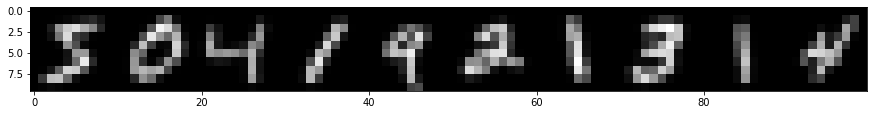

In [50]:
plt.figure(figsize=(15, 3))

train_images = resize(train_images, (50, 10, 10, 1))
test_images = resize(train_images, (50, 10, 10, 1))

np.shape(train_images)

plt.imshow(np.hstack(train_images[:10]), cmap='gray')

In [51]:
pd.DataFrame(np.vstack(train_images[0]).reshape(10, 10))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000e+00,0.000000e+00,3.779813e-09,5.703982e-07,0.000004,1.042152e-05,0.000015,8.009369e-06,1.619335e-08
1,0.000000,3.493966e-07,7.807178e-04,7.999273e-03,2.619184e-02,0.059819,1.155171e-01,0.155306,7.679844e-02,1.519801e-04
2,0.000000,9.857660e-05,1.036307e-01,5.545328e-01,7.500384e-01,0.815209,6.413300e-01,0.491694,1.539254e-01,2.481732e-04
3,0.000000,2.617595e-05,5.656854e-02,4.300613e-01,8.046835e-01,0.233121,1.624373e-01,0.008346,1.218553e-03,5.837837e-07
4,0.000000,9.748591e-09,1.279662e-04,2.502775e-02,5.374982e-01,0.290856,3.380014e-02,0.000305,1.190274e-08,0.000000e+00
5,0.000000,0.000000e+00,6.266862e-09,2.610279e-04,6.696573e-02,0.564458,5.666593e-01,0.047100,1.411354e-05,0.000000e+00
6,0.000000,4.497760e-08,3.063738e-05,3.220381e-03,7.633813e-02,0.401042,8.656932e-01,0.157746,1.073702e-04,0.000000e+00
7,0.000008,5.200728e-03,7.889449e-02,3.434775e-01,7.748787e-01,0.739755,3.174749e-01,0.021589,2.289392e-06,0.000000e+00
8,0.000387,2.102920e-01,6.982965e-01,7.215174e-01,3.777502e-01,0.048582,1.853358e-03,0.000010,1.813034e-10,0.000000e+00
9,0.000029,1.430609e-02,3.384249e-02,1.997844e-02,1.852532e-03,0.000012,1.298005e-08,0.000000,0.000000e+00,0.000000e+00


In [52]:
train_images = (train_images * 10).astype('int32')
test_images = (test_images * 10).astype('int32')

pd.DataFrame(np.vstack(train_images[0]).reshape(10, 10))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0
2,0,0,1,5,7,8,6,4,1,0
3,0,0,0,4,8,2,1,0,0,0
4,0,0,0,0,5,2,0,0,0,0
5,0,0,0,0,0,5,5,0,0,0
6,0,0,0,0,0,4,8,1,0,0
7,0,0,0,3,7,7,3,0,0,0
8,0,2,6,7,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


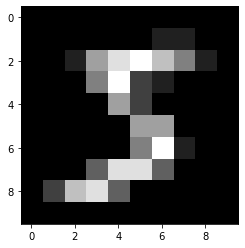

In [54]:
plt.imshow(train_images[0], cmap='gray')

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(10, 10, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 2)           20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 78
Trainable params: 78
Non-trainable params: 0
__________________________________________________________

In [57]:
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]
get_output

[<KerasTensor: shape=(None, 8, 8, 1) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 4, 4, 1) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 2, 2, 2) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

In [58]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[0])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2_input (InputLayer)  [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [59]:
len(visual_model.get_weights()),\
visual_model.get_weights()[0],\
visual_model.get_weights()[1]

(2,
 array([[[[-0.46005493]],
 
         [[-0.40739295]],
 
         [[ 0.33151543]]],
 
 
        [[[ 0.20788842]],
 
         [[ 0.4746729 ]],
 
         [[ 0.00352412]]],
 
 
        [[[-0.564068  ]],
 
         [[ 0.36241257]],
 
         [[ 0.08974451]]]], dtype=float32),
 array([0.], dtype=float32))

In [14]:
setW = np.array([[-0.4318703, 0.08380783, -0.23193197],
                 [0.05313462, 0.25442973, 0.33345792],
                 [-0.22227043, -0.02131751, 0.17737235]])
setB = np.array([-0.00019932])

setW = setW.reshape(3, 3, 1, 1)
weights = setW, setB
visual_model.set_weights(weights)

In [15]:
w = visual_model.get_weights()[0]
b = visual_model.get_weights()[1]
np.shape(w), np.vstack(w).reshape(3, 3), b

((3, 3, 1, 1),
 array([[-0.4318703 ,  0.08380783, -0.23193197],
        [ 0.05313462,  0.25442973,  0.33345792],
        [-0.22227043, -0.02131751,  0.17737235]], dtype=float32),
 array([-0.00019932], dtype=float32))

In [16]:
wVal = np.vstack(w).reshape(3, 3)
img = np.vstack(train_images[0]).reshape(10, 10)
img[:3, :3] * wVal, np.sum(img[:3, :3] * wVal) + b

(array([[-0.        ,  0.        , -0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.        , -0.        ,  0.17737235]]),
 array([0.17717303], dtype=float32))

In [17]:
wVal = np.vstack(w).reshape(3, 3)
img = np.vstack(train_images[0]).reshape(10, 10)
print('▶--- 0:3, 0:3 에서 스트라이드 1한  높이 0:3, 너비 1:4 인덱싱값 ')
print(img[0:3, 1:4])

print('\n▶-- img[0:3, 1:4] * w')
print(img[0:3, 1:4] * wVal)

print('\n▶-- img[0:3, 1:4] * w의 합 + b')
np.sum(img[0:3, 1:4] * wVal) + b

▶--- 0:3, 0:3 에서 스트라이드 1한  높이 0:3, 너비 1:4 인덱싱값 
[[0 0 0]
 [0 0 0]
 [0 1 5]]

▶-- img[0:3, 1:4] * w
[[-0.          0.         -0.        ]
 [ 0.          0.          0.        ]
 [-0.         -0.02131751  0.88686176]]

▶-- img[0:3, 1:4] * w의 합 + b


array([0.86534494], dtype=float32)

,0,1,2,3,4,5,6,7
0,0.000000,0.000000,0.466185,1.431679,2.087464,1.874020,0.948141,0.327784
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.376617,1.996235,2.275506,0.434068,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.506469,4.089482,0.422468,0.000000,0.288828,0.472767,0.000000
4,0.000000,0.000000,1.883087,1.802202,0.000000,0.000000,0.000000,0.170443
5,0.000000,0.000000,0.000000,2.838894,4.593320,0.000000,0.000000,0.000000
6,0.000000,0.654273,1.088384,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


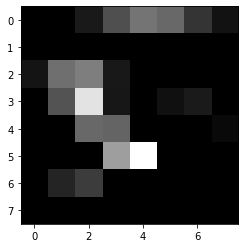

In [18]:
len(feature_maps[0][0])
plt.imshow(feature_maps[0], cmap='gray')
pd.DataFrame(np.vstack(feature_maps[0]).reshape(8, 8))

In [19]:
layer0 = feature_maps.copy()

In [20]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[1])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 1)           0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [21]:
maxpoolResult = np.vstack(feature_maps[0].reshape(4, 4))
maxpoolResult

array([[2.6310093 , 4.992998  , 2.6713052 , 1.0994523 ],
       [0.2577803 , 2.93569   , 0.        , 0.        ],
       [0.53191775, 2.331755  , 2.2812119 , 0.0529353 ],
       [3.2710578 , 2.146567  , 0.9660892 , 0.        ]], dtype=float32)

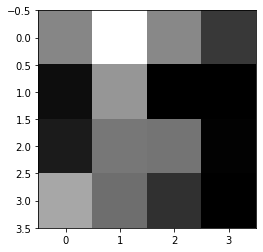

,0,1,2,3
0,2.631009,4.992998,2.671305,1.099452
1,0.257780,2.935690,0.000000,0.000000
2,0.531918,2.331755,2.281212,0.052935
3,3.271058,2.146567,0.966089,0.000000


In [22]:
plt.imshow(feature_maps[0], cmap='gray')
plt.show()
pd.DataFrame(np.vstack(feature_maps[0]).reshape(4, 4))

In [23]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[2])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 2)           20        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(len(visual_model.get_weights()))
w = visual_model.get_weights()[0]
b = visual_model.get_weights()[1]
print(np.vstack(w).reshape(3, 3), b)
print(np.shape(w), np.shape(b))
print('-' * 100)
w = visual_model.get_weights()[2]
b = visual_model.get_weights()[3]
print(w, b)

4
[[-0.4318703   0.08380783 -0.23193197]
 [ 0.05313462  0.25442973  0.33345792]
 [-0.22227043 -0.02131751  0.17737235]] [-0.00019932]
(3, 3, 1, 1) (1,)
----------------------------------------------------------------------------------------------------
[[[[ 0.4657503   0.42467466]]

  [[ 0.3300648  -0.09850338]]

  [[ 0.1203098  -0.08474708]]]


 [[[ 0.42534575  0.16345796]]

  [[ 0.02168235  0.47138217]]

  [[ 0.02882835 -0.32172263]]]


 [[[-0.38981542  0.28360602]]

  [[ 0.22772965  0.23231772]]

  [[-0.29981     0.07301286]]]] [0. 0.]


In [25]:
setW = np.array([[-0.4318703, 0.08380783, -0.23193197],
                 [0.05313462, 0.25442973, 0.33345792],
                 [-0.22227043, -0.02131751, 0.17737235]])
setB = np.array([-0.00019932])

w2 = visual_model.get_weights()[2]
b2 = visual_model.get_weights()[3]
setW = setW.reshape(3, 3, 1, 1)

weights = [setW, setB, w2, b2]
visual_model.set_weights(weights)

In [26]:
len(visual_model.get_weights())
w = visual_model.get_weights()[2]
b = visual_model.get_weights()[3]
w, b

(array([[[[ 0.4657503 ,  0.42467466]],
 
         [[ 0.3300648 , -0.09850338]],
 
         [[ 0.1203098 , -0.08474708]]],
 
 
        [[[ 0.42534575,  0.16345796]],
 
         [[ 0.02168235,  0.47138217]],
 
         [[ 0.02882835, -0.32172263]]],
 
 
        [[[-0.38981542,  0.28360602]],
 
         [[ 0.22772965,  0.23231772]],
 
         [[-0.29981   ,  0.07301286]]]], dtype=float32),
 array([0., 0.], dtype=float32))

In [27]:
visual_model.get_weights()

[array([[[[-0.4318703 ]],
 
         [[ 0.08380783]],
 
         [[-0.23193197]]],
 
 
        [[[ 0.05313462]],
 
         [[ 0.25442973]],
 
         [[ 0.33345792]]],
 
 
        [[[-0.22227043]],
 
         [[-0.02131751]],
 
         [[ 0.17737235]]]], dtype=float32),
 array([-0.00019932], dtype=float32),
 array([[[[ 0.4657503 ,  0.42467466]],
 
         [[ 0.3300648 , -0.09850338]],
 
         [[ 0.1203098 , -0.08474708]]],
 
 
        [[[ 0.42534575,  0.16345796]],
 
         [[ 0.02168235,  0.47138217]],
 
         [[ 0.02882835, -0.32172263]]],
 
 
        [[[-0.38981542,  0.28360602]],
 
         [[ 0.22772965,  0.23231772]],
 
         [[-0.29981   ,  0.07301286]]]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [28]:
maxpoolResult

array([[2.6310093 , 4.992998  , 2.6713052 , 1.0994523 ],
       [0.2577803 , 2.93569   , 0.        , 0.        ],
       [0.53191775, 2.331755  , 2.2812119 , 0.0529353 ],
       [3.2710578 , 2.146567  , 0.9660892 , 0.        ]], dtype=float32)

In [29]:
f1 = w[:, :, :, 0]
f2 = w[:, :, :, 1]

print('maxpoolResult 값')
print(maxpoolResult[:3, :3])
print(
    '\n▶피처1값',
    '-' * 100,
)
print(f1.reshape(3, 3))
print(
    '\n▶피처2값',
    '-' * 100,
)
print(f2.reshape(3, 3))

print('\n▶[0:3,0:3]*피처1값+b[0]합', '-' * 50)
print(np.sum(maxpoolResult[:3, :3] * f1.reshape(3, 3)) + b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합', '-' * 50)
np.sum(maxpoolResult[:3, :3] * f2.reshape(3, 3)) + b[1]

maxpoolResult 값
[[2.6310093  4.992998   2.6713052 ]
 [0.2577803  2.93569    0.        ]
 [0.53191775 2.331755   2.2812119 ]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[ 0.4657503   0.3300648   0.1203098 ]
 [ 0.42534575  0.02168235  0.02882835]
 [-0.38981542  0.22772965 -0.29981   ]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[ 0.42467466 -0.09850338 -0.08474708]
 [ 0.16345796  0.47138217 -0.32172263]
 [ 0.28360602  0.23231772  0.07301286]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
3.007819

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


2.6841996

In [30]:
feature_maps

array([[[[3.007819  , 2.6841996 ],
         [4.1828275 , 3.4390843 ]],

        [[0.35568473, 1.7693881 ],
         [1.793331  , 3.5193682 ]]]], dtype=float32)

In [31]:
f1 = w[:, :, :, 0]
f2 = w[:, :, :, 1]

print('maxpoolResult 값')
print(maxpoolResult[0:3, 1:4])
print(
    '\n▶피처1값',
    '-' * 100,
)
print(f1.reshape(3, 3))
print(
    '\n▶피처2값',
    '-' * 100,
)
print(f1.reshape(3, 3))

print('\n▶[0:3,0:3]*피처1값+b[0]합', '-' * 50)
print(np.sum(maxpoolResult[0:3, 1:4] * f1.reshape(3, 3)) + b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합', '-' * 50)
np.sum(maxpoolResult[0:3, 1:4] * f2.reshape(3, 3)) + b[0]

maxpoolResult 값
[[4.992998  2.6713052 1.0994523]
 [2.93569   0.        0.       ]
 [2.331755  2.2812119 0.0529353]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[ 0.4657503   0.3300648   0.1203098 ]
 [ 0.42534575  0.02168235  0.02882835]
 [-0.38981542  0.22772965 -0.29981   ]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[ 0.4657503   0.3300648   0.1203098 ]
 [ 0.42534575  0.02168235  0.02882835]
 [-0.38981542  0.22772965 -0.29981   ]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
4.1828275

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


3.4390843

In [32]:
f1 = w[:, :, :, 0]
f2 = w[:, :, :, 1]

print('maxpoolResult 값')
print(maxpoolResult[1:4, 0:3])
print(
    '\n▶피처1값',
    '-' * 100,
)
print(f1.reshape(3, 3))
print(
    '\n▶피처2값',
    '-' * 100,
)
print(f2.reshape(3, 3))

print('\n▶[0:3,0:3]*피처1값+b[0]합', '-' * 50)
print(np.sum(maxpoolResult[1:4, 0:3] * f1.reshape(3, 3)) + b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합', '-' * 50)
np.sum(maxpoolResult[1:4, 0:3] * f2.reshape(3, 3)) + b[0]

maxpoolResult 값
[[0.2577803  2.93569    0.        ]
 [0.53191775 2.331755   2.2812119 ]
 [3.2710578  2.146567   0.9660892 ]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[ 0.4657503   0.3300648   0.1203098 ]
 [ 0.42534575  0.02168235  0.02882835]
 [-0.38981542  0.22772965 -0.29981   ]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[ 0.42467466 -0.09850338 -0.08474708]
 [ 0.16345796  0.47138217 -0.32172263]
 [ 0.28360602  0.23231772  0.07301286]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
0.35568467

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


1.7693881

In [33]:
f1 = w[:, :, :, 0]
f2 = w[:, :, :, 1]

print('maxpoolResult 값')
print(maxpoolResult[1:4, 1:4])
print(
    '\n▶피처1값',
    '-' * 100,
)
print(f1.reshape(3, 3))
print(
    '\n▶피처2값',
    '-' * 100,
)
print(f1.reshape(3, 3))

print('\n▶[0:3,0:3]*피처1값+b[0]합', '-' * 50)
print(np.sum(maxpoolResult[1:4, 1:4] * f1.reshape(3, 3)) + b[0])

print('\n▶[0:3,0:3]*피처2값+b[1]합', '-' * 50)
np.sum(maxpoolResult[1:4, 1:4] * f2.reshape(3, 3)) + b[0]

maxpoolResult 값
[[2.93569   0.        0.       ]
 [2.331755  2.2812119 0.0529353]
 [2.146567  0.9660892 0.       ]]

▶피처1값 ----------------------------------------------------------------------------------------------------
[[ 0.4657503   0.3300648   0.1203098 ]
 [ 0.42534575  0.02168235  0.02882835]
 [-0.38981542  0.22772965 -0.29981   ]]

▶피처2값 ----------------------------------------------------------------------------------------------------
[[ 0.4657503   0.3300648   0.1203098 ]
 [ 0.42534575  0.02168235  0.02882835]
 [-0.38981542  0.22772965 -0.29981   ]]

▶[0:3,0:3]*피처1값+b[0]합 --------------------------------------------------
1.7933309

▶[0:3,0:3]*피처2값+b[1]합 --------------------------------------------------


3.5193682

In [34]:
conv2 = feature_maps
conv2

array([[[[3.007819  , 2.6841996 ],
         [4.1828275 , 3.4390843 ]],

        [[0.35568473, 1.7693881 ],
         [1.793331  , 3.5193682 ]]]], dtype=float32)

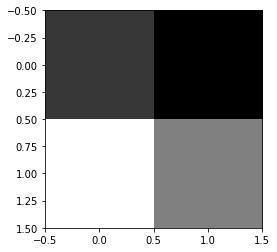

In [35]:
plt.imshow(feature_maps[0][0], cmap='gray')

In [36]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[3])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 2)           20        
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [37]:
len(visual_model.get_weights())

4

In [38]:
feature_maps

array([[3.007819  , 2.6841996 , 4.1828275 , 3.4390843 , 0.35568473,
        1.7693881 , 1.793331  , 3.5193682 ]], dtype=float32)

In [39]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[4])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 2)           20        
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 18        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_______________________________________________________________

In [40]:
len(visual_model.get_weights())

6

In [41]:
flatten

NameError: name 'flatten' is not defined

In [42]:
w = visual_model.get_weights()[4]
b = visual_model.get_weights()[5]
w, b

(array([[-0.08328271, -0.6201209 ],
        [-0.64177316, -0.16175026],
        [ 0.7119651 , -0.14700055],
        [-0.1377818 , -0.65200895],
        [-0.43558487,  0.11100549],
        [-0.00390428,  0.10601991],
        [ 0.5623026 , -0.29918393],
        [-0.19677615, -0.7697816 ]], dtype=float32),
 array([0., 0.], dtype=float32))

In [43]:
feature_maps

array([[0.68609744, 0.        ]], dtype=float32)

In [44]:
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output[5])
visual_model.summary()
test_img = np.expand_dims(test_images[0], axis=0)
feature_maps = visual_model.predict(test_img)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 10, 10, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 1)           10        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 2)           20        
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 2)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30  

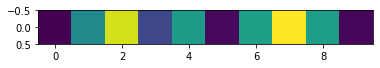

In [45]:
plt.imshow(feature_maps)